# softmax


In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
easy_train = pd.read_csv(data_dir / "classification" / "easy-training.csv")
easy_test = pd.read_csv(data_dir / "classification" / "easy-test.csv")
rings_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
xor_train = pd.read_csv(data_dir / "classification" / "xor3-training.csv")
xor_test = pd.read_csv(data_dir / "classification" / "xor3-test.csv")

# easy dataset

In [3]:
easy_train

,x,y,c
0,-72.829461,-40.239391,False
1,-65.464396,-60.501516,False
2,14.389589,74.223994,False
3,-92.335628,17.466916,False
4,-61.058421,-16.761820,False
...,...,...,...
495,96.279863,-95.125533,True
496,-41.625338,-48.713720,True
497,-64.545443,-91.317035,True
498,-27.066599,-89.894718,True


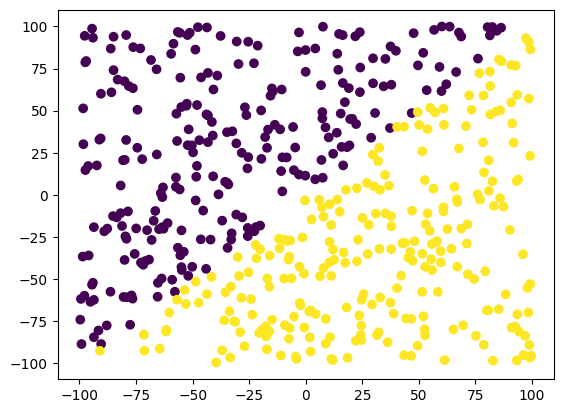

In [4]:
plt.scatter(easy_train.x, easy_train.y, c=easy_train.c)

In [5]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    # {"output_dim": 2, "activation": "softmax", "init": "normal"}
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp = networks.MLP(layers, input=easy_test[["x", "y"]].T, output_type="classification")


initializing layer 0 using normal initialization


In [6]:
norm = networks.assets.Normalizator(easy_train[["x", "y"]])

train = norm(easy_train[["x", "y"]])
y_train = easy_train.c.values.reshape(-1, 1)
test = norm(easy_test[['x', 'y']])
y_test = easy_test.c.values.reshape(-1, 1)

In [7]:
max_epochs = 500

In [8]:
np.ones((1, 2))

array([[1., 1.]])

initializing layer 0 using normal initialization
Epoch: 0, Loss: 0.5864065875820267
Epoch: 100, Loss: 0.34559005780984


Epoch: 200, Loss: 0.2387465829382118
Epoch: 300, Loss: 0.18901470417607788
Epoch: 400, Loss: 0.16241359381960524


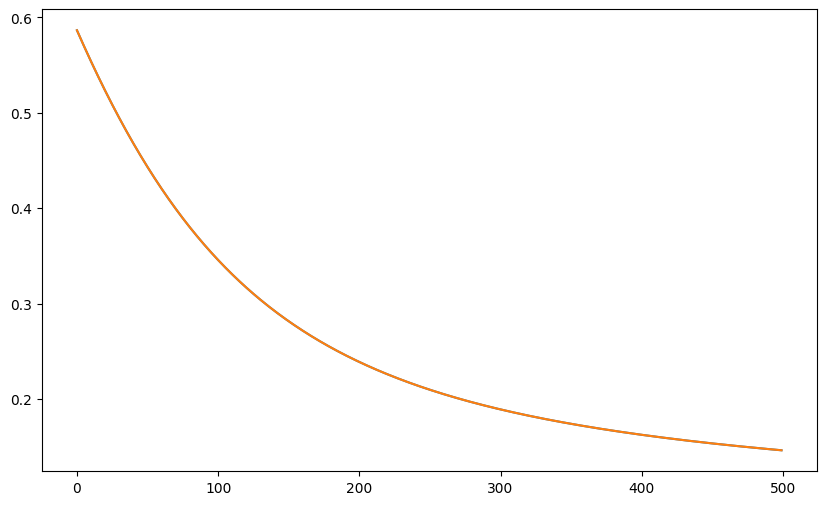

In [9]:
mlp = networks.MLP(layers, input=train.T, output_type="classification")

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.01, max_epochs=max_epochs, batch_size=256)


plt.plot(losses)

Text(0.5, 1.0, 'Prediction of the model , num of epochs: 500')

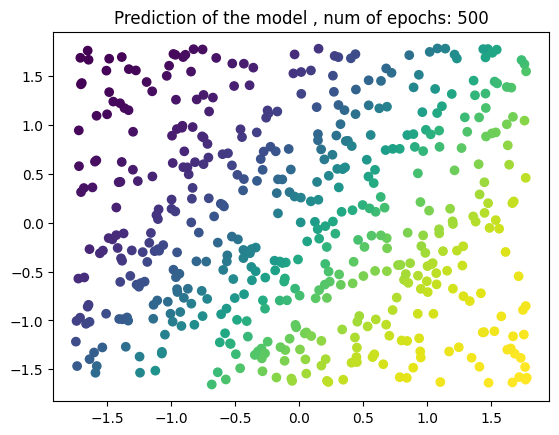

In [10]:
y_hat = mlp.full_forward_pass(train.T)

plt.scatter(train.x, train.y, c=y_hat)
#plt.scatter(train.x, train.y, c=y_train.flatten(), alpha=0.1)

plt.title(f"Prediction of the model , num of epochs: {max_epochs}")

initializing layer 0 using normal initialization
Epoch: 0, Loss: 1.0319098150053172
Epoch: 100, Loss: 0.8015472079848591
Epoch: 200, Loss: 0.755642149574828
Epoch: 300, Loss: 0.7559487061746584
Epoch: 400, Loss: 0.7619698701551859


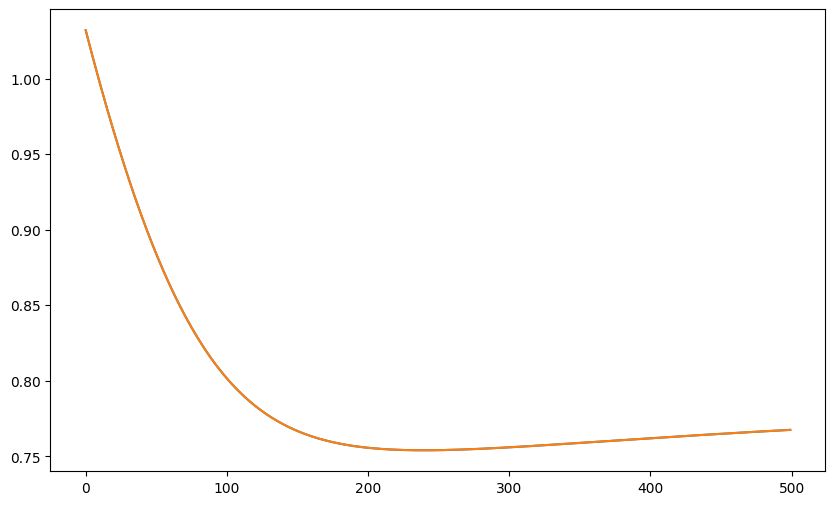

In [50]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    #{"output_dim": 2, "activation": "softmax", "init": "normal"}
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 500

mlp = networks.MLP(layers, input=train.T, output_type="classification")

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.01, max_epochs=max_epochs, batch_size=256)


plt.plot(losses)

loss: 0.7675003872539167


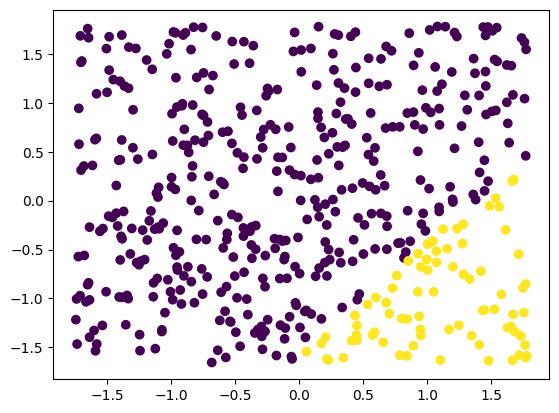

In [51]:

dw, db = mlp.full_backward_propagation(train.T.to_numpy(), y_train.T)


y_hat = mlp.predict(train.T)
print("loss:", mlp.calculate_loss(train.T, y_train.T))

plt.scatter(train.x, train.y, c=y_hat)

mlp.layers[0].weights -= 0.01 * dw[0]
mlp.layers[0].bias -= 0.01 * db[0]

In [29]:
y_pred = mlp.predict(test.T)
print("Fscore on test set:", mlp.Fscore(y_pred, y_test.T))


Fscore on test set: 0.43478260869565216


## rings3 

In [12]:
rings_train.c.value_counts()

c
0    500
1    500
2    500
Name: count, dtype: int64

In [13]:
rings_train

,x,y,c
0,-93.563317,-76.345110,0
1,1.060114,-16.727040,0
2,24.396099,40.358822,0
3,-94.595137,-97.889250,0
4,-85.331382,-56.736933,0
...,...,...,...
1495,-3.227585,-69.846357,2
1496,-82.598085,-51.758017,2
1497,-46.601078,-21.654871,2
1498,-59.106450,-44.528442,2


initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 1.4750996292935545
Epoch: 100, Loss: 1.4750996292935545
Epoch: 200, Loss: 1.4750996292935545
Epoch: 300, Loss: 1.4750996292935543
Epoch: 400, Loss: 1.4750996292935543
Epoch: 500, Loss: 1.4750996292935543
Epoch: 600, Loss: 1.4750996292935543
Epoch: 700, Loss: 1.4750996292935543
Epoch: 800, Loss: 1.4750996292935539
Epoch: 900, Loss: 1.4750996292935543


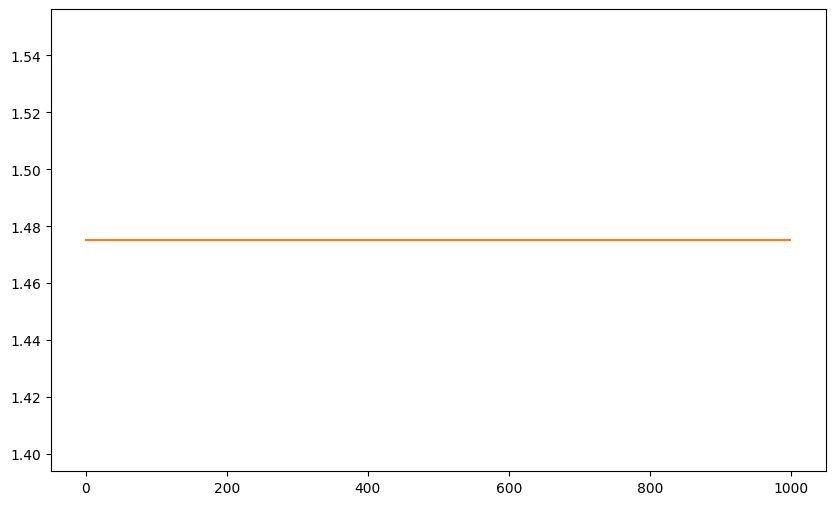

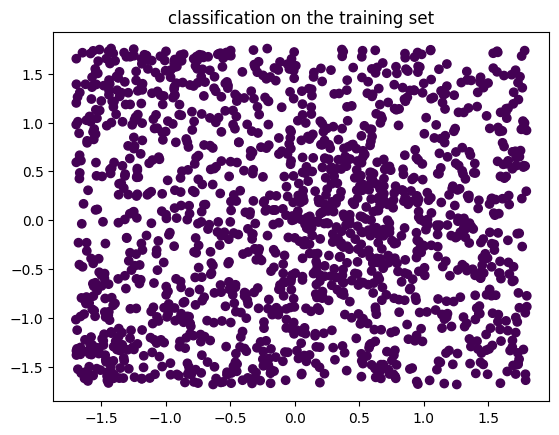

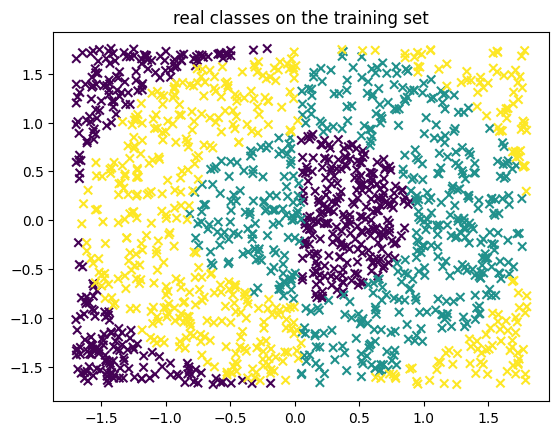

Fscore on test set: 0.0


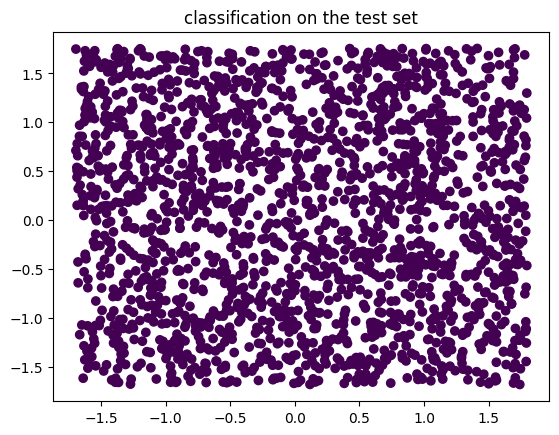

Text(0.5, 1.0, 'real classes on the test set')

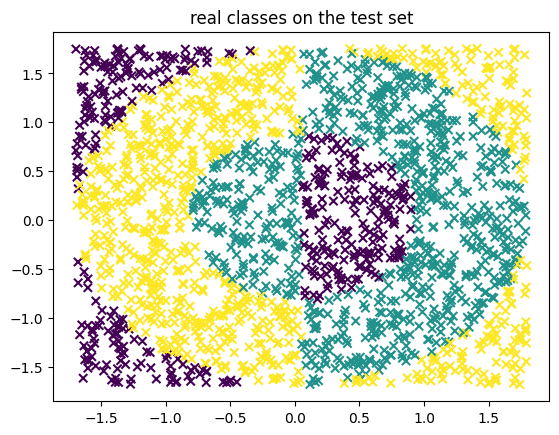

In [16]:
layers = [
    {"output_dim": 5, "activation": "relu", "init": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "relu", "init": "he"},

    {"output_dim": 3, "activation": "softmax", "init": "normal"}
]



norm = networks.assets.Normalizator(rings_train[["x", "y"]])
train = norm(rings_train[["x", "y"]])
test = norm(rings_test[['x', 'y']])

y_train = rings_train.c.T.to_numpy().reshape(-1, 1)
y_test = rings_test.c.T.to_numpy().reshape(-1, 1)

mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification")

max_epochs = 1000

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.01, max_epochs=max_epochs, batch_size=256)


plt.plot(losses)

plt.show()
y_hat = mlp.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")
plt.title("real classes on the training set")
plt.show()

y_pred = mlp.predict(test.T)
print("Fscore on test set:", mlp.Fscore(y_pred, y_test.T))

plt.scatter(test.x, test.y, c=y_pred)
plt.title("classification on the test set")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c, marker="x")
plt.title("real classes on the test set")


In [17]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(),
                         max_epochs=max_epochs, learning_rate = 0.002, batch_size=32)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

NameError: name 'steps_large_train_norm' is not defined

MSE on test data:  11.536160418151873


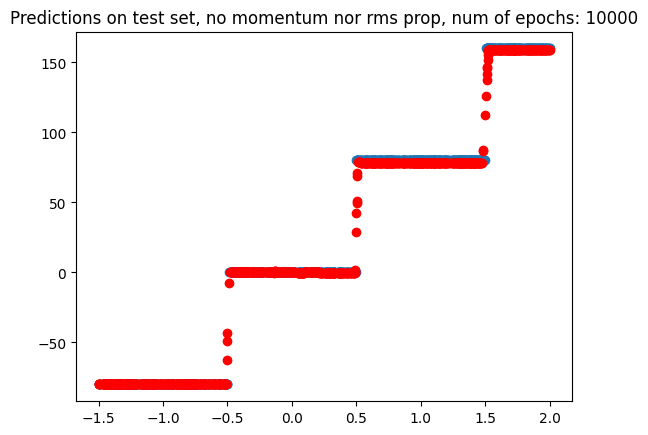

In [29]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on test set, no momentum nor rms prop, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

In [30]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)

momentum_decay = 0.05


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), momentum=True, momentum_decay=momentum_decay,
                         max_epochs=max_epochs, learning_rate = 0.002, batch_size=32)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.07694954191680346
Epoch: 100, Loss: 0.06246918724393147


MSE on train data:  19.77802769211912


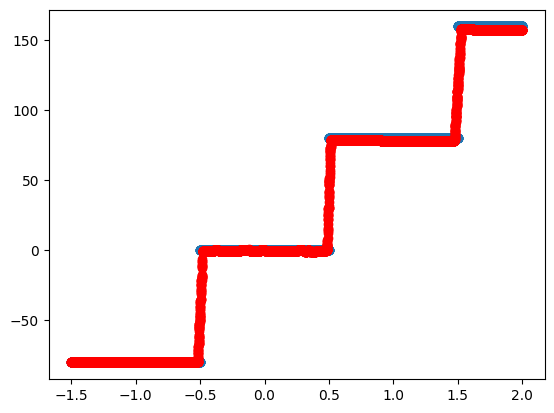

In [43]:
y_hat = mlp_steps.full_forward_pass(steps_large_train_norm[["x"]].T).to_numpy()

plt.scatter(steps_large_train["x"], steps_large_train["y"])
plt.scatter(steps_large_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on train set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  16.494716137204172


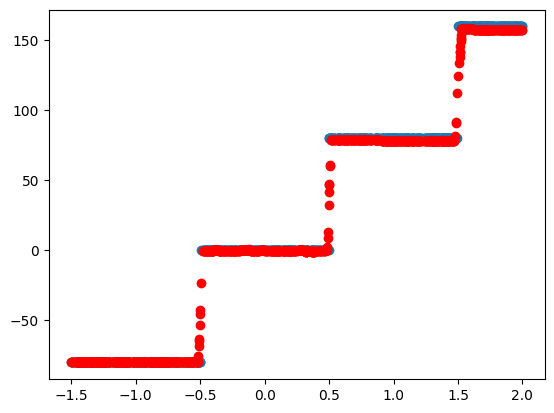

In [44]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")
plt.title(f"Predictions on test set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.07980200814910211
Epoch: 100, Loss: 0.061380323563494564
Epoch: 200, Loss: 0.0508009758416012
Epoch: 300, Loss: 0.04010679647948193
Epoch: 400, Loss: 0.0272032735731041
Epoch: 500, Loss: 0.02153558972939999
Epoch: 600, Loss: 0.01879207808010955
Epoch: 700, Loss: 0.01710721860448614
Epoch: 800, Loss: 0.015223219569276122
Epoch: 900, Loss: 0.013197354346550134
Epoch: 1000, Loss: 0.011172391286167463
Epoch: 1100, Loss: 0.009426662912527133
Epoch: 1200, Loss: 0.008093003327078586
Epoch: 1300, Loss: 0.007176208172195356
Epoch: 1400, Loss: 0.0065201712085242464
Epoch: 1500, Loss: 0.006022751885027506
Epoch: 1600, Loss: 0.005627667417168163
Epoch: 1700, Loss: 0.005294631962912018
Epoch: 1800, Loss: 0.005008460137632154
Epoch: 1900, Loss: 0.004761649955820752
Epoch: 2000, Loss: 0.004544892390911443
Epoch: 2100, Loss: 0.004354992471396217
E

Text(0.5, 1.0, 'Training Loss')

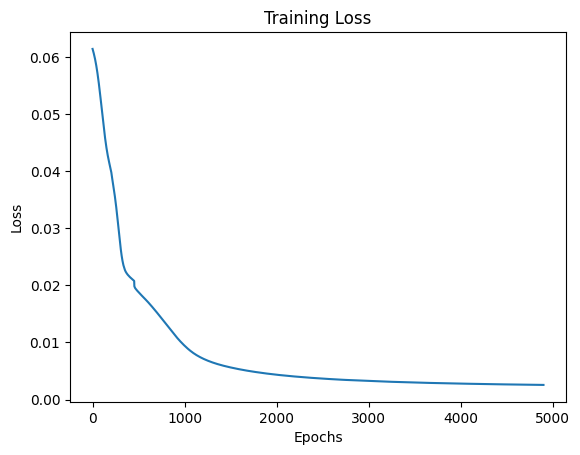

In [9]:
mlp_steps = networks.MLP(layers, input=steps_large_train_norm[["x"]].T)

squred_gradient_decay = 0.9


losses = mlp_steps.train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), rms_prop=True, squared_gradient_decay=squred_gradient_decay,
                         max_epochs=5000, learning_rate = 0.002, batch_size=32)
# losses = mlp_steps.minibatch_train(steps_large_train_norm[["x"]].T.to_numpy(), steps_large_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  14.174005213064245


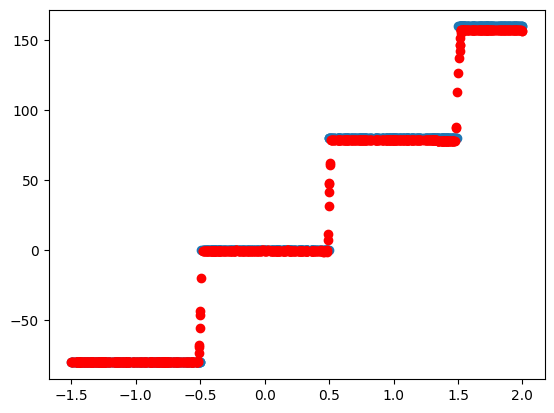

In [10]:
y_hat = mlp_steps.full_forward_pass(steps_large_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_large_test["x"], steps_large_test["y"])
plt.scatter(steps_large_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with RMSprop with squared gradients decay {squred_gradient_decay}, num of epochs: {max_epochs}")

mse = np.mean((steps_large_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

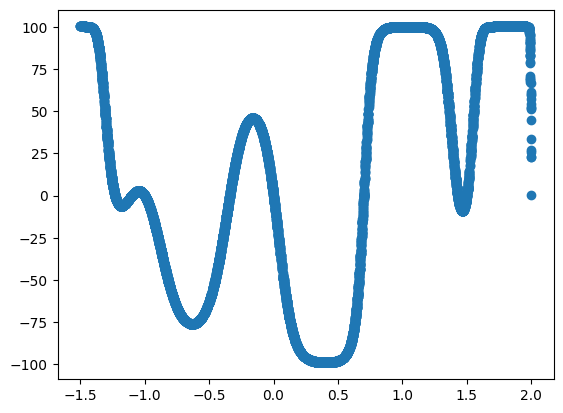

In [12]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [13]:
multimodal_large_train_norm.std()

x    1.0
y    1.0
dtype: float64

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.33171441127196066
Epoch: 100, Loss: 0.07463816466209755
Epoch: 200, Loss: 0.010263122484947016
Epoch: 300, Loss: 0.002940941311826873
Epoch: 400, Loss: 0.002340375267482782
Epoch: 500, Loss: 0.0021434453722763767
Epoch: 600, Loss: 0.002126397109698646
Epoch: 700, Loss: 0.002037259021616708
Epoch: 800, Loss: 0.00199608916315308
Epoch: 900, Loss: 0.002026327069505218
Epoch: 1000, Loss: 0.001999917045523579
Epoch: 1100, Loss: 0.001989756595371686
Epoch: 1200, Loss: 0.0020134051102449076
Epoch: 1300, Loss: 0.0019911287198653275
Epoch: 1400, Loss: 0.0019875003128494036
Epoch: 1500, Loss: 0.0019266363816933375
Epoch: 1600, Loss: 0.0018628724578754338
Epoch: 1700, Loss: 0.0018057431174763898
Epoch: 1800, Loss: 0.0018046588382666338
Epoch: 1900, Loss: 0.0017790827687591104


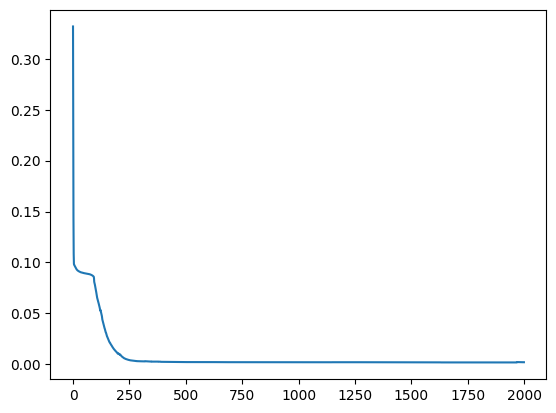

In [20]:
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

max_epochs = 5000

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=max_epochs, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02)

plt.plot(losses)

MSE on test data:  7.122961363479482


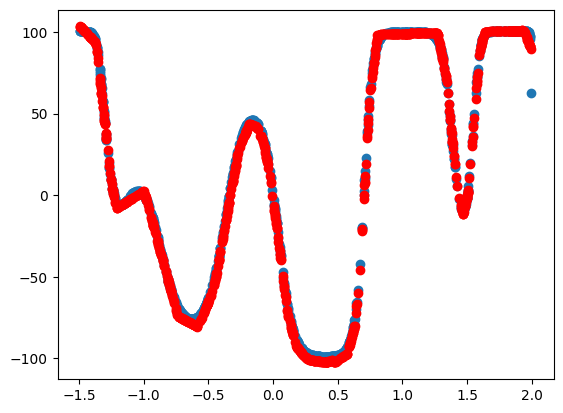

In [22]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, no momentum nor rms prop, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.31827501903628924
Epoch: 100, Loss: 0.03364524493799352
Epoch: 200, Loss: 0.030914659144162693
Epoch: 300, Loss: 0.029736357624270335
Epoch: 400, Loss: 0.029621928044653696
Epoch: 500, Loss: 0.029583144331819005
Epoch: 600, Loss: 0.02951493387522735
Epoch: 700, Loss: 0.02947656175280328
Epoch: 800, Loss: 0.02947016369821489
Epoch: 900, Loss: 0.029533297311642916
Epoch: 1000, Loss: 0.029605802111652656
Epoch: 1100, Loss: 0.02969140916857217
Epoch: 1200, Loss: 0.029772071596648745
Epoch: 1300, Loss: 0.029830358725603152
Epoch: 1400, Loss: 0.029864076044868754
Epoch: 1500, Loss: 0.02988159126141913
Epoch: 1600, Loss: 0.029878207451494318
Epoch: 1700, Loss: 0.029851179855145692
Epoch: 1800, Loss: 0.029810938964530187
Epoch: 1900, Loss: 0.027398584714756646


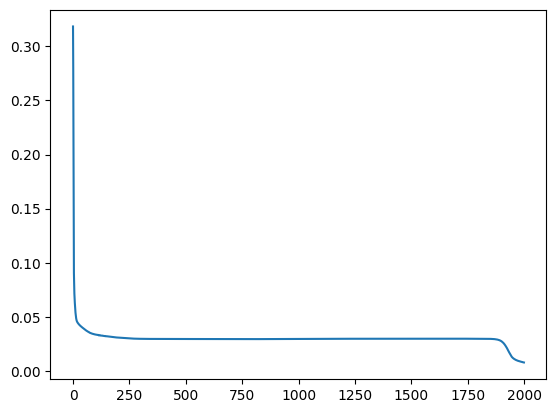

In [32]:

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)

momentum_decay = 0.05


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=max_epochs, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02, momentum=True, momentum_decay=momentum_decay)

plt.plot(losses)

MSE on test data:  22.75933411063397


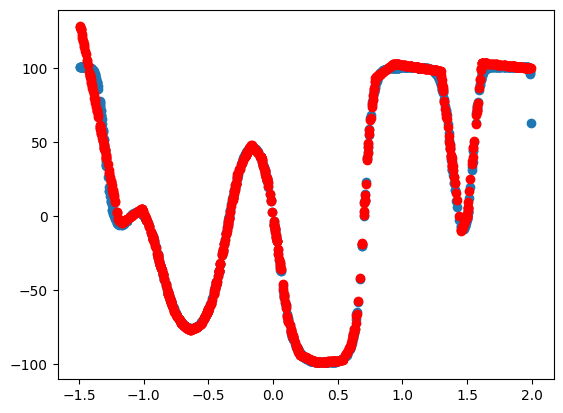

In [24]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with momentum decay {momentum_decay}, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.2877534724565222
Epoch: 100, Loss: 0.03266206300494266
Epoch: 200, Loss: 0.02872159210145154
Epoch: 300, Loss: 0.017903711054463842
Epoch: 400, Loss: 0.005182811978806502
Epoch: 500, Loss: 0.004391867826714463
Epoch: 600, Loss: 0.0035691416424032695
Epoch: 700, Loss: 0.0028567388753471747
Epoch: 800, Loss: 0.0023583332126449266
Epoch: 900, Loss: 0.0020911919848234416
Epoch: 1000, Loss: 0.0019571949195627634
Epoch: 1100, Loss: 0.0018862320300512508
Epoch: 1200, Loss: 0.0018492633065978488
Epoch: 1300, Loss: 0.0018232322532685031
Epoch: 1400, Loss: 0.0018070375237893412
Epoch: 1500, Loss: 0.0017967907997167736
Epoch: 1600, Loss: 0.001789171069256988
Epoch: 1700, Loss: 0.0017826093331933172
Epoch: 1800, Loss: 0.0017775134362032674
Epoch: 1900, Loss: 0.001773215987194604


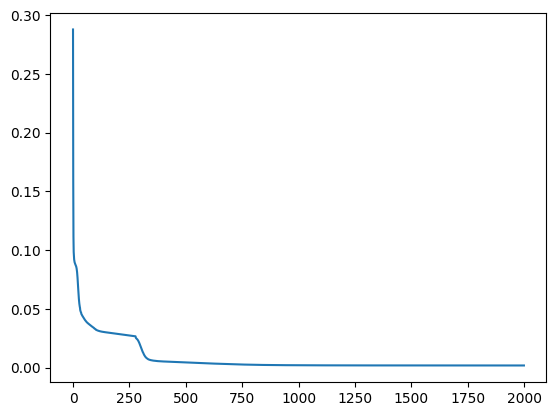

In [29]:

mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)

squred_gradient_decay = 0.9


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=2000, batch_size=32, early_loss_stop = 1e-8, learning_rate=0.02, rms_prop=True, squared_gradient_decay=squred_gradient_decay)

plt.plot(losses)

MSE on test data:  4.617810229104412


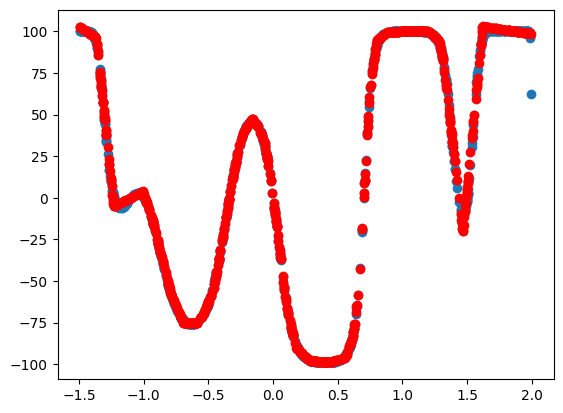

In [30]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

plt.title(f"Predictions on test set, with RMSprop with squared gradients decay {squred_gradient_decay}, num of epochs: {max_epochs}")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)